In [34]:
import mdtraj as md 
#import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os, sys
import importlib
import subprocess as sp
import seaborn as sns 

In [2]:
def source_module(module_file: str, local_module_name: str = None):

    """to add a module from a user defined python script into the local name space"""

    #
    if local_module_name is None:
        local_module_name = module_file.split("/")[-1].replace(".py", "")

    if len(module_file.split("/")) == 1 or module_file.split("/")[-2] == ".":
        module_dir = os.getcwd()
    else:
        module_dir = "/".join(module_file.split("/")[:-1])

    sys.path.insert(0, module_dir)

    module = importlib.import_module(module_file.split("/")[-1].replace(".py", ""))

    g = globals()
    g[local_module_name] = module

    pass

source_module("/Users/anjalidhar/Desktop/Packages/mdtools.py")

### Loading the data ###

In [3]:
ADdir = '/Users/anjalidhar/Desktop/mmgbsa/autodock'
MDdir = '/Users/anjalidhar/Desktop/mmgbsa/MD'

In [4]:
energies = {}

In [5]:
energies['AD'] = {}
runs = ['47on47bf', '41on41bf', '23on23bf']
for run in runs: 
    outdir = f'{ADdir}/{run}'
    energies['AD'][run] = [np.load(x) for x in mdtools.lsdir(outdir, keyword='npy')]



In [6]:
energies['MD'] = {}
runs = ['47bf', '41bf', '23bf']
for run in runs: 
    outdir = f'{MDdir}/{run}'
    energies['MD'][run] = [np.load(x) for x in mdtools.lsdir(outdir, keyword='npy')]



In [7]:
angledir = '/Users/anjalidhar/Desktop/autodock/trajectory_bendangles'
angles = {}
traj_type = ['apo', '47bf', '41bf', '23bf']
for traj in traj_type: 
    angles[traj] = np.load(f'{angledir}/{traj}_angles.npy')

In [8]:
def get_trajtype(name): 
    if 'apo' in name: 
        return 'apo'
    else: 
        return name[-4:]
    
def min_max_norm(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)


### Plotting first the angle dependent scores ###

In [9]:
idx_23on23bf = np.array([2, 3, 5, 8, 12, 13, 14, 16, 17, 19])

(-15.0, 100.0)

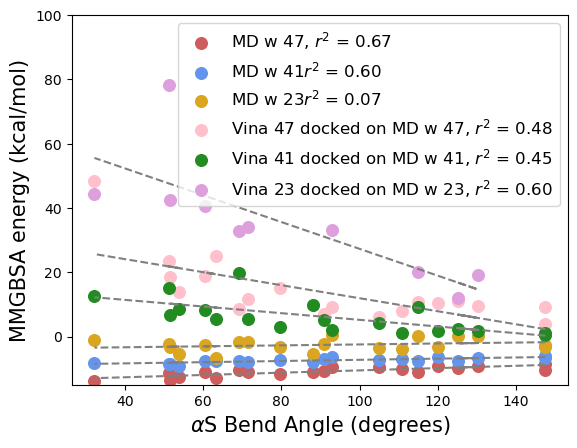

In [18]:
ang = angles['47bf']
energies['MD']['47bf']

for i, en in enumerate([energies['MD']['47bf'], energies['MD']['41bf'], energies['MD']['23bf'], energies['AD']['47on47bf'], energies['AD']['41on41bf'], energies['AD']['23on23bf']]): 
    scores = np.array([x.mean() for x in en]) #np.array(en).mean(1)

    if i == 5: # 23on23bf case where we don't have everything
        subset_ang = ang[idx_23on23bf]
        ndict = mdtools.PolyRegression1D(subset_ang, scores, degree=1, intercept=True)[0]
        plt.scatter(subset_ang, scores, 
                label='Vina 23 docked on MD w 23, ' + rf"$r^{2}$ = {ndict['r2']:.2f}",
                color='plum', s=70)
        plt.plot(subset_ang, ndict['ypred'], ls="--", color="grey")

    else: 
        ndict = mdtools.PolyRegression1D(ang, scores, degree=1, intercept=True)[0]

        plt.scatter(ang, scores, 
                    label=['MD w 47, ', 'MD w 41', 'MD w 23', 'Vina 47 docked on MD w 47, ', 'Vina 41 docked on MD w 41, '][i] + rf"$r^{2}$ = {ndict['r2']:.2f}",
                    color=['indianred', 'cornflowerblue', 'goldenrod', 'pink', 'forestgreen'][i], s=70)
        plt.plot(ang, ndict['ypred'], ls="--", color="grey")


plt.legend(fontsize=12, loc='upper right')

plt.ylabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlabel(r'$\alpha$S Bend Angle (degrees)', fontsize=15)
plt.ylim([-15, 100])



(-18.0, 2.5)

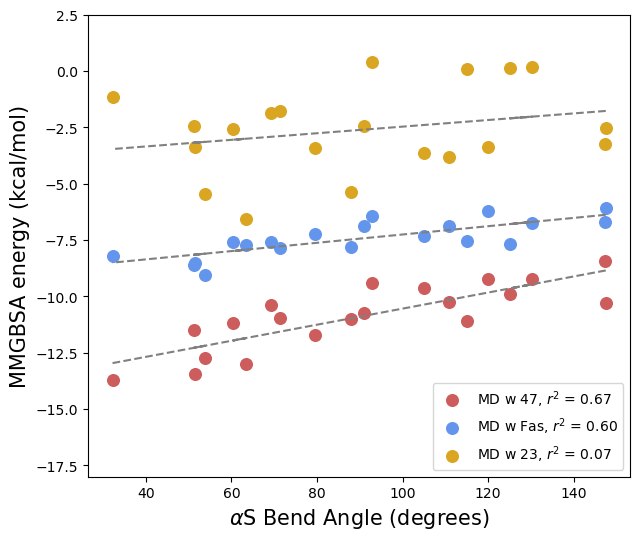

In [33]:
ang = angles['47bf']
energies['MD']['47bf']

plt.figure(figsize=(7, 6))

for i, en in enumerate([energies['MD']['47bf'], energies['MD']['41bf'], energies['MD']['23bf']]): 
    scores = np.array([x.mean() for x in en]) #np.array(en).mean(1)

    ndict = mdtools.PolyRegression1D(ang, scores, degree=1, intercept=True)[0]

    plt.scatter(ang, scores, 
                label=['MD w 47, ', 'MD w Fas, ', 'MD w 23, ' ][i] + rf"$r^{2}$ = {ndict['r2']:.2f}",
                color=['indianred', 'cornflowerblue', 'goldenrod'][i], s=70)
    plt.plot(ang, ndict['ypred'], ls="--", color="grey")


plt.legend(fontsize=10, loc='lower right')

plt.ylabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlabel(r'$\alpha$S Bend Angle (degrees)', fontsize=15)
plt.ylim([-18, 2.5])



Text(0.5, 0, '$\\alpha$S Bend Angle (degrees)')

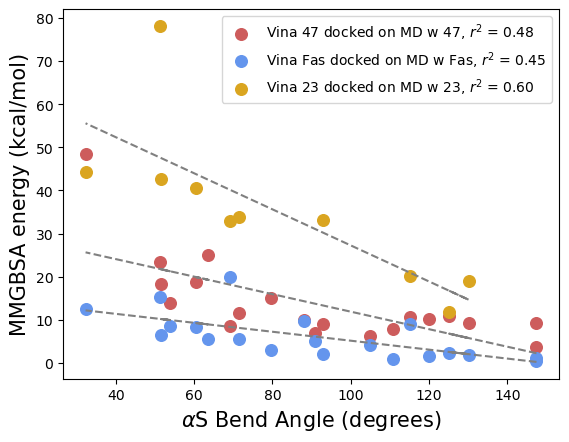

In [32]:
ang = angles['47bf']
energies['MD']['47bf']

for i, en in enumerate([energies['AD']['47on47bf'], energies['AD']['41on41bf'], energies['AD']['23on23bf']]): 
    scores = np.array([x.mean() for x in en]) #np.array(en).mean(1)

    if i == 2: # 23on23bf case where we don't have everything
        subset_ang = ang[idx_23on23bf]
        ndict = mdtools.PolyRegression1D(subset_ang, scores, degree=1, intercept=True)[0]
        plt.scatter(subset_ang, scores, 
                label='Vina 23 docked on MD w 23, ' + rf"$r^{2}$ = {ndict['r2']:.2f}",
                color='goldenrod', s=70)
        plt.plot(subset_ang, ndict['ypred'], ls="--", color="grey")

    else: 
        ndict = mdtools.PolyRegression1D(ang, scores, degree=1, intercept=True)[0]

        plt.scatter(ang, scores, 
                    label=['Vina 47 docked on MD w 47, ', 'Vina Fas docked on MD w Fas, '][i] + rf"$r^{2}$ = {ndict['r2']:.2f}",
                    color=['indianred', 'cornflowerblue'][i], s=70)
        plt.plot(ang, ndict['ypred'], ls="--", color="grey")


plt.legend(fontsize=10, loc='upper right')

plt.ylabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlabel(r'$\alpha$S Bend Angle (degrees)', fontsize=15)
# plt.ylim([-15, 100])



### Now plotting the histograms so we can see them ###

/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

(-15.0, 100.0)

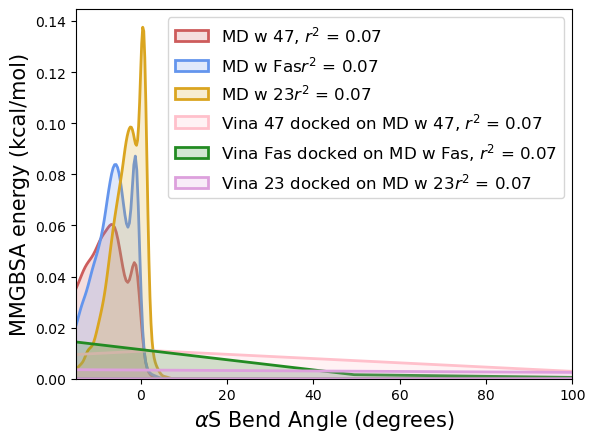

In [40]:
ang = angles['47bf']
energies['MD']['47bf']

for i, en in enumerate([energies['MD']['47bf'], energies['MD']['41bf'], energies['MD']['23bf'], energies['AD']['47on47bf'], energies['AD']['41on41bf'], energies['AD']['23on23bf']]): 
    scores = np.concatenate(en) #np.array(en).mean(1)




    sns.kdeplot(scores, 
                label=['MD w 47, ', 'MD w Fas', 'MD w 23', 'Vina 47 docked on MD w 47, ', 'Vina Fas docked on MD w Fas, ', 'Vina 23 docked on MD w 23'][i] + rf"$r^{2}$ = {ndict['r2']:.2f}",
                color=['indianred', 'cornflowerblue', 'goldenrod', 'pink', 'forestgreen', 'plum'][i], fill=True, alpha=0.2, lw=2)
      


plt.legend(fontsize=12, loc='upper right')

plt.ylabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlabel(r'$\alpha$S Bend Angle (degrees)', fontsize=15)
plt.xlim([-15, 100])



/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-35.0, 8.0)

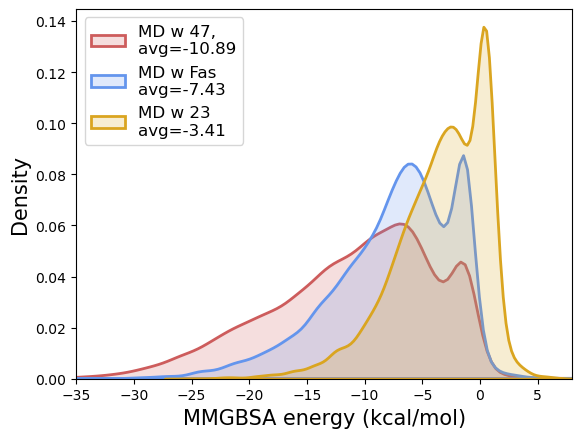

In [57]:
ang = angles['47bf']
energies['MD']['47bf']

for i, en in enumerate([energies['MD']['47bf'], energies['MD']['41bf'], energies['MD']['23bf']]): 
    scores = np.concatenate(en) #np.array(en).mean(1)




    sns.kdeplot(scores, 
                label=['MD w 47, ', 'MD w Fas', 'MD w 23', ][i]+f'\navg={np.mean(scores):.2f}',
                color=['indianred', 'cornflowerblue', 'goldenrod'][i], fill=True, alpha=0.2, lw=2)
      


plt.legend(fontsize=12, loc='upper left')

plt.ylabel('Density', fontsize=15)
plt.xlabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlim([-35, 8])



/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjalidhar/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-300.0, 700.0)

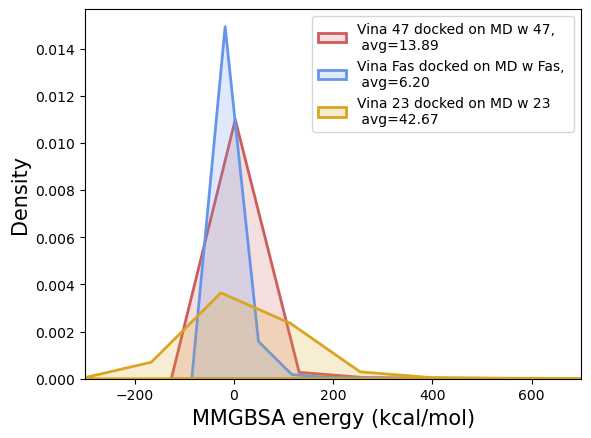

In [56]:
ang = angles['47bf']
energies['MD']['47bf']

for i, en in enumerate([energies['AD']['47on47bf'], energies['AD']['41on41bf'], energies['AD']['23on23bf']]): 
    scores = np.concatenate(en) #np.array(en).mean(1)




    sns.kdeplot(scores, 
                label=['Vina 47 docked on MD w 47, ', 'Vina Fas docked on MD w Fas, ', 'Vina 23 docked on MD w 23'][i]+f'\n avg={np.mean(scores):.2f}',
                color=['indianred', 'cornflowerblue', 'goldenrod'][i], fill=True, alpha=0.2, lw=2)
      


plt.legend(fontsize=10, loc='upper right')

plt.ylabel('Density', fontsize=15)
plt.xlabel('MMGBSA energy (kcal/mol)', fontsize=15)
plt.xlim([-300, 700])

